Вариант 5 Вывести распределение количества объявлений в зависимости количества
комнат.

In [14]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

# 1. Подгрузка данных
try:
    # Указываем разделитель как точку с запятой
    fl = pd.read_csv('/home/Rent.csv', sep=';')
    print("Данные успешно загружены")
    print(f"Всего строк: {len(fl)}")
except FileNotFoundError:
    print("Файл Rent.csv не найден. Убедитесь, что файл находится в правильной директории.")
    exit()

# # Альтернативный вариант с использованием формул
# print("\nРегрессионная модель с использованием формул:")
# model_formula = smf.ols(formula='rent ~ rooms', data=fl).fit()
# print(model_formula.summary())

# # Дополнительный анализ: корреляция между переменными
# print("\nМатрица корреляций:")
# print(fl.corr())

Данные успешно загружены
Всего строк: 130


In [3]:
# 2. Структурирование данных
print("\nСтруктура данных:")
print(fl.head())
print("\nИнформация о данных:")
print(fl.info())


Структура данных:
    rent     s  floor  rooms  walls  district
0  24000  50.0      5      2      1         1
1  11250  15.0      1      1      0         2
2  30000  69.0      2      2      1         1
3  19500  39.0     12      1      0         4
4  12000  18.0      3      1      1         3

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      130 non-null    int64  
 1   s         130 non-null    float64
 2   floor     130 non-null    int64  
 3   rooms     130 non-null    int64  
 4   walls     130 non-null    int64  
 5   district  130 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.2 KB
None


In [4]:
# 3. Анализ типов данных
print("\nТипы данных:")
print(fl.dtypes)


Типы данных:
rent          int64
s           float64
floor         int64
rooms         int64
walls         int64
district      int64
dtype: object


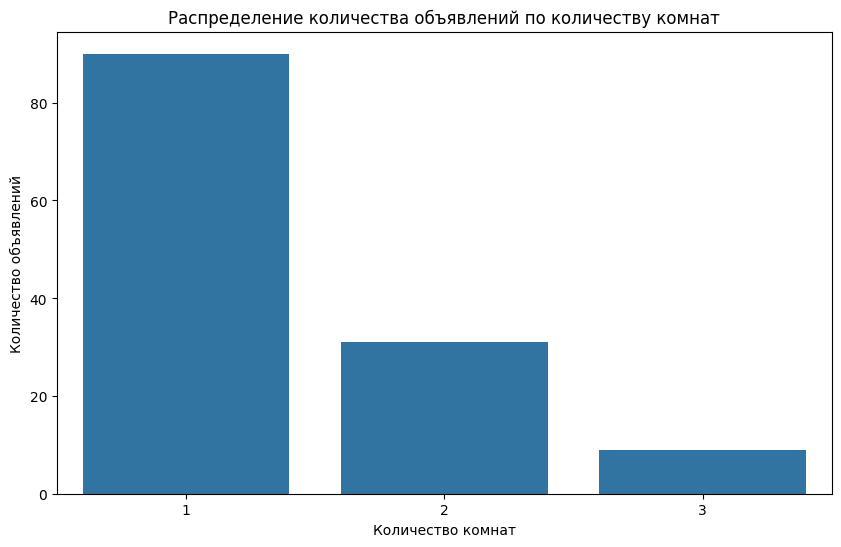

In [5]:
# 4. Визуализация данных (Вариант 5: распределение количества объявлений в зависимости от количества комнат)
plt.figure(figsize=(10, 6))
sns.countplot(x='rooms', data=fl)
plt.title('Распределение количества объявлений по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

In [6]:
# 5. Проверка критерия асимметрии и эксцесса для количества комнат
print("\nКоэффициент асимметрии для количества комнат:")
print(fl['rooms'].skew())
print("Коэффициент эксцесса для количества комнат:")
print(fl['rooms'].kurtosis())


Коэффициент асимметрии для количества комнат:
1.404406481730714
Коэффициент эксцесса для количества комнат:
0.8851705816420843


In [7]:
# 6. Проверка гипотезы о виде распределения (нормальность распределения количества комнат)
stat, p = stats.normaltest(fl['rooms'])
print("\nТест на нормальность распределения количества комнат:")
print(f"Статистика: {stat:.3f}, p-value: {p:.3f}")
alpha = 0.05
if p > alpha:
    print("Распределение не отличается от нормального (не отвергаем H0)")
else:
    print("Распределение отличается от нормального (отвергаем H0)")


Тест на нормальность распределения количества комнат:
Статистика: 31.698, p-value: 0.000
Распределение отличается от нормального (отвергаем H0)


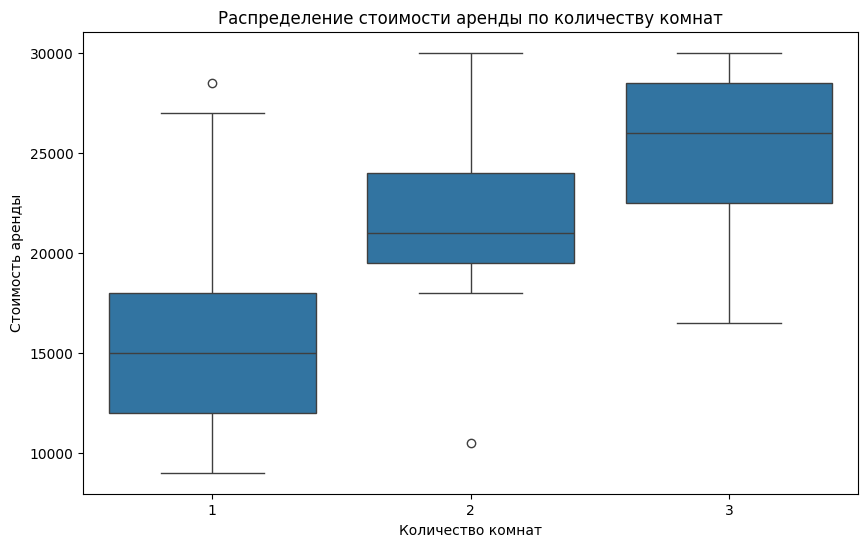

In [8]:
# 7. Оценка связи между показателями (количество комнат и стоимость аренды)
# Визуализация связи
plt.figure(figsize=(10, 6))
sns.boxplot(x='rooms', y='rent', data=fl)
plt.title('Распределение стоимости аренды по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость аренды')
plt.show()

In [9]:
# 8. Формулировка и проверка гипотез
# Сравним стоимость аренды для 1-комнатных и 2-комнатных квартир
print("\nПроверка гипотез:")
print("H0: Нет статистически значимых различий в стоимости аренды между 1-комнатными и 2-комнатными квартирами")
print("H1: Есть статистически значимые различия в стоимости аренды между 1-комнатными и 2-комнатными квартирами")

fl_1 = fl[fl['rooms'] == 1]
fl_2 = fl[fl['rooms'] == 2]

stat, p = mannwhitneyu(fl_1['rent'], fl_2['rent'])
print(f"\nРезультат теста Манна-Уитни: статистика = {stat:.3f}, p-value = {p:.3f}")

if p > alpha:
    print("Не отвергаем H0: значимых различий не обнаружено")
else:
    print("Отвергаем H0: есть значимые различия")


Проверка гипотез:
H0: Нет статистически значимых различий в стоимости аренды между 1-комнатными и 2-комнатными квартирами
H1: Есть статистически значимые различия в стоимости аренды между 1-комнатными и 2-комнатными квартирами

Результат теста Манна-Уитни: статистика = 367.500, p-value = 0.000
Отвергаем H0: есть значимые различия



Построение регрессионной модели:


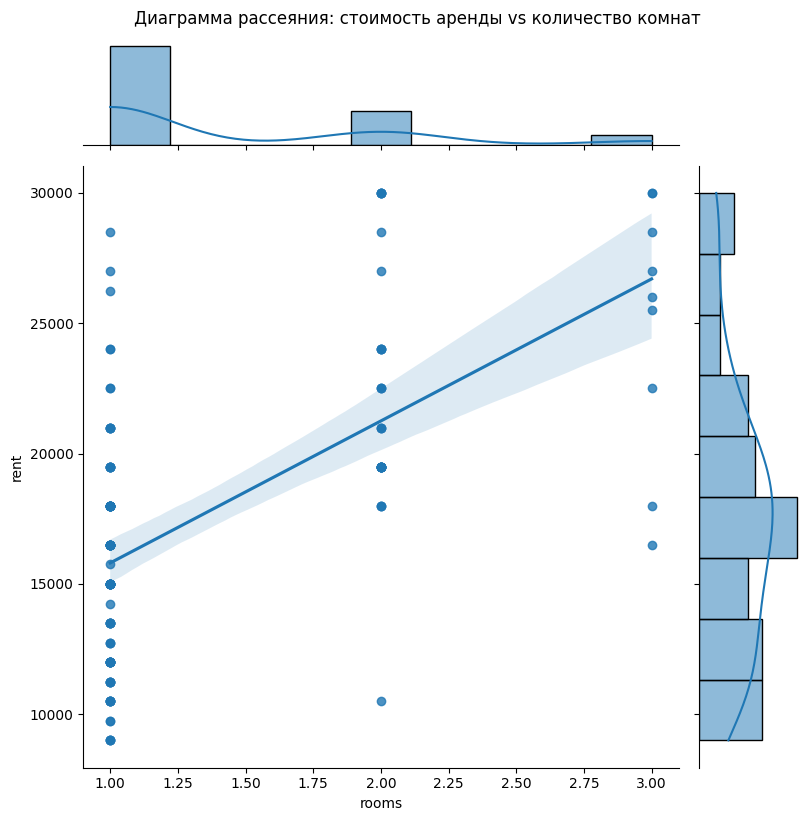

In [10]:
# 9. Построение регрессионной модели (зависимость стоимости аренды от количества комнат)
print("\nПостроение регрессионной модели:")
# Визуализация диаграммы рассеяния
sns.jointplot(x='rooms', y='rent', data=fl, kind='reg', height=8)
plt.suptitle('Диаграмма рассеяния: стоимость аренды vs количество комнат', y=1.02)
plt.show()

In [13]:
# Построение модели линейной регрессии
X = sm.add_constant(fl['rooms'])  # Добавляем константу
y = fl['rent']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     72.67
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.67e-14
Time:                        09:22:10   Log-Likelihood:                -1275.6
No. Observations:                 130   AIC:                             2555.
Df Residuals:                     128   BIC:                             2561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.036e+04    962.643     10.761      0.0